<a href="https://colab.research.google.com/github/visithraravi98-lang/kmeans-algorithm/blob/main/k_means__clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


=== CUSTOM K-MEANS RESULTS ===
Centroids:
Cluster 1: [-2.4852093   8.99849336  4.61608496  2.06671616 -6.83707619]
Cluster 2: [-9.63609995  9.25885832  6.71772996 -5.72400462 -6.48268624]
Cluster 3: [-6.8606281  -8.75325738  7.37413322  1.97170435  4.09006292]

Inertia (Custom): 3543.002717799538
Silhouette Score (Custom): 0.7291134417789717

=== SCIKIT-LEARN K-MEANS RESULTS ===
Inertia (Sklearn): 3543.0027177995385


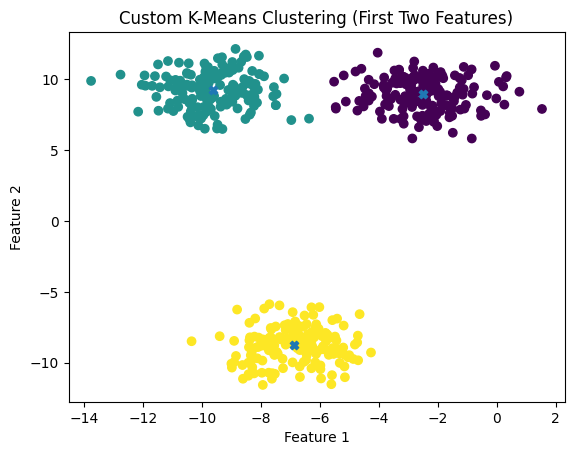

In [10]:
# -------------------------------
# 1. DATASET GENERATION
# -------------------------------
np.random.seed(42)

X, y_true = make_blobs(
    n_samples=500,
    n_features=5,
    centers=3,
    cluster_std=1.2,
    random_state=42
)

# -------------------------------
# 2. CUSTOM K-MEANS IMPLEMENTATION
# -------------------------------
class KMeansFromScratch:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape

        # Random initialization of centroids
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # E-step: assign clusters
            labels = self._assign_clusters(X)

            # M-step: update centroids
            new_centroids = np.array([
                X[labels == i].mean(axis=0) for i in range(self.k)
            ])

            # Check convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

        self.labels_ = labels
        return self

    def _assign_clusters(self, X):
        distances = np.linalg.norm(
            X[:, np.newaxis] - self.centroids, axis=2
        )
        return np.argmin(distances, axis=1)

    def inertia(self, X):
        total = 0
        for i in range(self.k):
            cluster_points = X[self.labels_ == i]
            total += np.sum((cluster_points - self.centroids[i]) ** 2)
        return total
# -------------------------------
# 3. APPLY CUSTOM K-MEANS
# -------------------------------
custom_kmeans = KMeansFromScratch(k=3)
custom_kmeans.fit(X)

custom_labels = custom_kmeans.labels_
custom_centroids = custom_kmeans.centroids
custom_inertia = custom_kmeans.inertia(X)
custom_silhouette = silhouette_score(X, custom_labels)

# -------------------------------
# 4. APPLY SCIKIT-LEARN K-MEANS
# -------------------------------
sk_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
sk_labels = sk_kmeans.fit_predict(X)

sk_inertia = sk_kmeans.inertia_
sk_silhouette = silhouette_score(X, sk_labels)

# -------------------------------
# 5. PRINT RESULTS (TEXT OUTPUT)
# -------------------------------
print("=== CUSTOM K-MEANS RESULTS ===")
print("Centroids:")
for i, c in enumerate(custom_centroids):
    print(f"Cluster {i+1}: {c}")

print(f"\nInertia (Custom): {custom_inertia}")
print(f"Silhouette Score (Custom): {custom_silhouette}")

print("\n=== SCIKIT-LEARN K-MEANS RESULTS ===")
print(f"Inertia (Sklearn): {sk_inertia}")
# -------------------------------
# 6. VISUALIZATION (2D PROJECTION)
# -------------------------------
plt.figure()
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=custom_labels
)
plt.scatter(
    custom_centroids[:, 0],
    custom_centroids[:, 1],
    marker='X'
)
plt.title("Custom K-Means Clustering (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
